<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Londres (Inglaterra)

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


De acordo com o site Viva Mundo, Londres é a segunda melhor cidade para intercambio, o que é um polo atrativo para pesquisadores e estudantes internacionais, iremos verificar informações como maiores e menores preços, tipos de imóveis mais alugados, localidades mais caras e etc. 

Verificando o ranking das Top5 Universidades em Londres, de acordo com o site Elondres, elas estão entre 1,7 e 3,3 milhas de City of London, será ela a cidade mais cara para se hospedar? Iremos descobrir juntos


Viva mundo: https://bit.ly/31J9Ewz

Elondres https://bit.ly/2HhJCa6
       

<center><img src="https://www.minutoseguros.com.br/blog/wp-content/uploads/2019/08/londres-1024x412.jpg" height="100px"></center>



**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

# **Obtenção dos Dados**


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id** - Número de id gerado para identificar o imóvel
* **name** - Nome da pripriedade anunciada 
* **host_id**	- Numero do id do proprietário (anfitrião) da propriedade
* **host_name** - Nome do anfitrião
* **neighbourhood_group** - Esta coluna contém um valor válido
* **neighbourhood** - Nome do bairro
* **latitude** - Coordenada da latitude da propriedade
* **longitude** - Coordenada da longitude da propriedade
* **room_type** - Informa o tipo de quarto que é oferecido
* **price** - Preço para alugar o imóvel
* **minimum_nights** - Quantidade mínima de noites para reservar
* **number_of_reviews** - Número de reviews que a propriedade possui
* **last_review** - Data do último review
* **reviews_per_month** - Quantidade de reviews por mês
* **calculated_host_listings_count** - Quantidade de imóveis do mesmo anfitrião
* **availability_365** - Número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos analisar as 5 primeiras entradas do nosso dataset.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


# **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print('Quantidade de Variáveis: {}'.format(df.shape[0]))
print('Quantidade de Entradas: {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Quantidade de Variáveis: 85068
Quantidade de Entradas: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
n = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(n)
df_n.style.format(" {:.2%}")

,0
neighbourhood_group,100.00%
reviews_per_month,23.52%
last_review,23.52%
name,0.03%
host_name,0.01%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%


Acima temos os valores:
* A coluna **neighbourhood_group** com 100% dos seus valores vazios.
* As variáveis **reviews_per_month** e **last_review** com 23,52% dos seus valores vazios.
* A variável **name** com 0,03% dos valores vazios.
* A variável **host_name** com 0,01% dos valores vazios.

# **Q3. Qual o tipo de distribuição das variáveis?** 

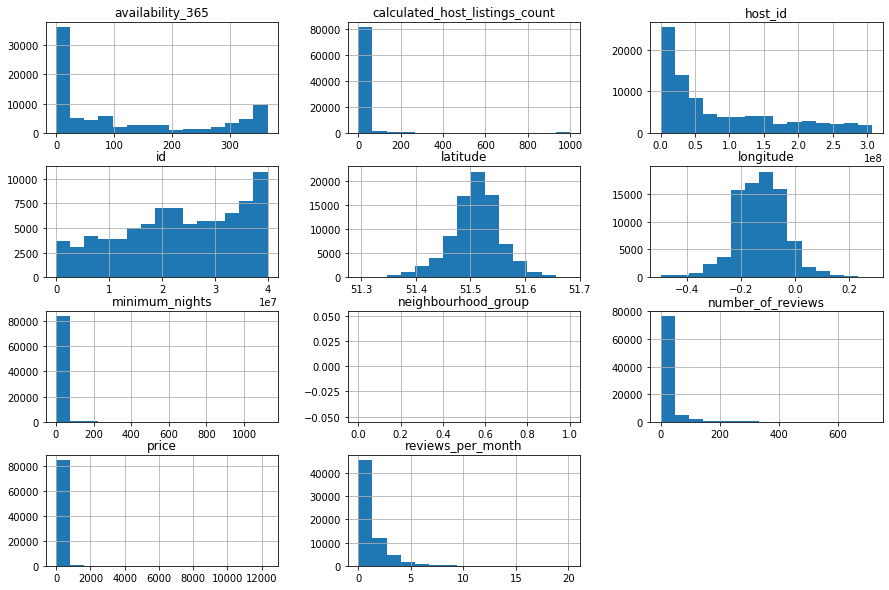

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

* Nos gráficos acima, podemos ver a presença de valores outliers nas colunas **calculated_host_listings_count**, **minimum_nigths** e **price** 

## Identificando os valores outliers presentes nas colunas:

*Outliers* : Em estatística, outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série, ou que é inconsistente. A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos testes estatísticos aplicados às amostras.
fonte: https://pt.wikipedia.org/wiki/Outlier

In [8]:
df[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85068.000000,85068.000000,85068.000000,65062.000000,85068.000000,85068.000000
mean,122.336766,4.148105,17.471152,1.201995,22.151150,118.471987
std,220.749123,16.681720,36.789578,1.402728,110.654631,134.840097
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,0.250000,1.000000,0.000000
50%,84.000000,2.000000,4.000000,0.730000,1.000000,58.000000
75%,140.000000,3.000000,17.000000,1.630000,5.000000,244.000000
max,12345.000000,1125.000000,716.000000,20.130000,999.000000,365.000000


* **count** - Contagem de valor de variáveis
* **mean** - Média dos valores da variável
* **std** - Desvio padrão
* **min** - Valor mínimo presente na coluna
* **25%** - 25% dos valores presentes na coluna
* **50%** - 50% dos valores presentes na coluna (mediana)
* **75%** - 75% dos valores presentes na coluna
* **max** - Valor máximo presente na coluna

* Coluna  **minimum_nights** com valores superiores a 365 dias.
* Na coluna **price** além de um alto desvio padrão, temos preço superior a 12 mil.
* Coluna  **calculated_host_listings_count** informando 999 imóveis do mesmo dono.


 


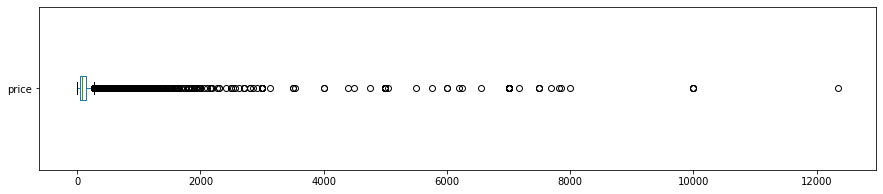

price: Valores acima de 140:
20415 entradas
23.9984%

price: Valores acima de 250:
9693 entradas
11.3944%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
# ver preços acima de 140.00
print("price: Valores acima de 140:")
print("{} entradas".format(len(df[df.price > 140])))
print("{:.4f}%\n".format((len(df[df.price > 140]) / df.shape[0])*100))
# ver preços acima de 250.00
print("price: Valores acima de 250:")
print("{} entradas".format(len(df[df.price > 200])))
print("{:.4f}%".format((len(df[df.price > 200]) / df.shape[0])*100))

## Removendo valores Outliers para nova análise

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 140].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 60].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# **Verificando os dados sem valores Outliers**

### Atributos (variáveis) e entradas o nosso conjunto de dados possui

In [12]:
print('Quantidade de variaveis {}'.format(df_clean.shape[0]))
print('Quantidade de entradas {}'.format(df_clean.shape[1]))
reduzido = (df_clean.shape[0] / df.shape[0]) -1
print('Retiramos {:.2%} de dados na limpeza do dataset'.format(reduzido * (-1)))

Quantidade de variaveis 62459
Quantidade de entradas 15
Retiramos 26.58% de dados na limpeza do dataset


### Distribuição das variáveis sem presença de Outliers

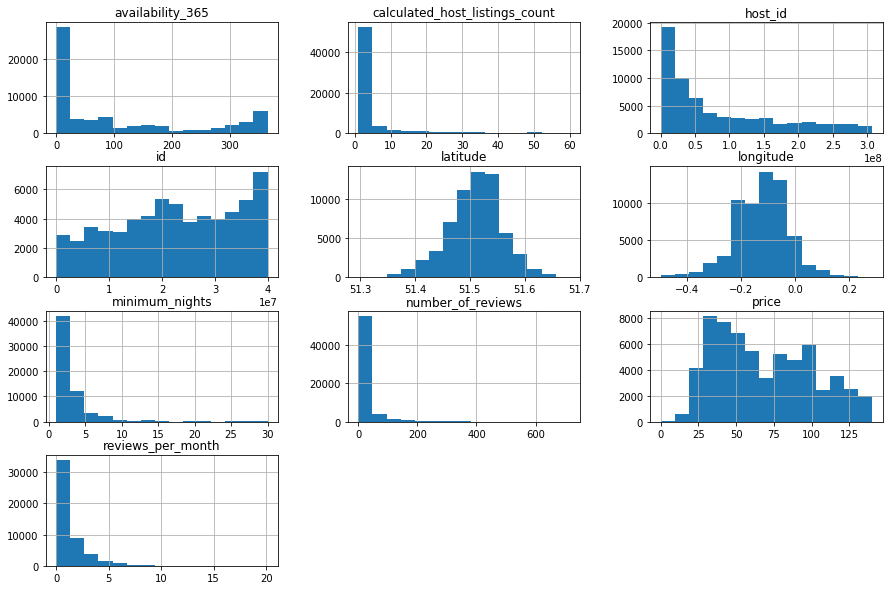

In [13]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### Resumo estatístico

In [14]:
df_clean[['price', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,62459.000000,62459.000000,62459.000000,49384.000000,62459.000000,62459.000000
mean,68.597816,2.831505,19.730511,1.257427,4.316544,106.020349
std,32.814392,3.589246,40.613587,1.483709,8.783731,130.094302
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000
50%,64.000000,2.000000,5.000000,0.750000,1.000000,40.000000
75%,95.000000,3.000000,20.000000,1.710000,3.000000,180.000000
max,140.000000,30.000000,716.000000,20.130000,60.000000,365.000000


# **Q4. Qual a média dos preços de aluguel?**

In [15]:
# ver a média da coluna `price``
df_clean[['price']].describe()

,price
count,62459.000000
mean,68.597816
std,32.814392
min,0.000000
25%,40.000000
50%,64.000000
75%,95.000000
max,140.000000


Analisando somente os preços, temos:
* Uma média de preços de 68.59
* Um desvio padrão abaixo da média apresentada
* 25% dos valores estão abaixo de 40.00
* 50% dos valores estão abaixo de 64.00
* 75% dos preços estão abaixo de 95.00 e seu valor máximo é 140.00



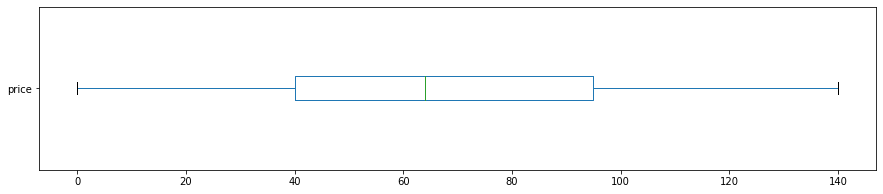

In [16]:
# price
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()




In [17]:
m1 = len(df_clean[df_clean.price < 40])
m2 = len(df_clean[df_clean.price < 95])
count = m2 - m1

print("price: Valores entre 40.00 e 95.00:")
print("{:.2f}%".format((count / df_clean.shape[0])*100))

price: Valores entre 40.00 e 95.00:
51.40%


* Concentração de preços entre 40.00 a 95.00 equivale a mais de 50% dos preços
 



# **Q5. Qual a correlação existente entre as variáveis**

In [18]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.006234,-0.057342,-0.053060,0.116967,0.018920
minimum_nights,0.006234,1.000000,-0.095944,-0.179987,-0.039354,-0.024592
number_of_reviews,-0.057342,-0.095944,1.000000,0.574830,0.042518,0.161282
reviews_per_month,-0.053060,-0.179987,0.574830,1.000000,0.113694,0.165800
calculated_host_listings_count,0.116967,-0.039354,0.042518,0.113694,1.000000,0.231534
availability_365,0.018920,-0.024592,0.161282,0.165800,0.231534,1.000000


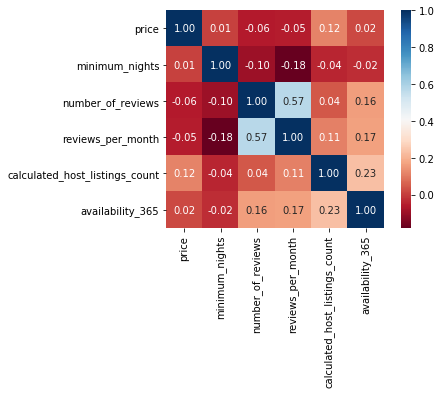

In [19]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor="white", annot=True);




* A unica correção entre os dados que encontramos foi a de **reviews_per_month** com **number_of_reviews**.

# **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Private room       34147
Entire home/apt    27323
Shared room          590
Hotel room           399
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
b = (df_clean.room_type.value_counts() / df_clean.shape[0])
df_clean_b = pd.DataFrame(b)
df_clean_b.style.format('{:.2%}')

,room_type
Private room,54.67%
Entire home/apt,43.75%
Shared room,0.94%
Hotel room,0.64%


O tipo de imóvel mais alugado é o **Private room** e o segundo **Entire home/apt**, ambos formam 98,42% dos dados em **room_type**

# **Q7. Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            99.055556
Kensington and Chelsea    91.997339
Westminster               88.062094
Camden                    78.845598
Islington                 76.692901
Hammersmith and Fulham    76.582560
Richmond upon Thames      71.973036
Wandsworth                70.489423
Southwark                 69.618210
Hackney                   68.327203
Name: price, dtype: float64

* Os dados apresentam a cidade de **City of London** como a cidade mais cara para se hospedar



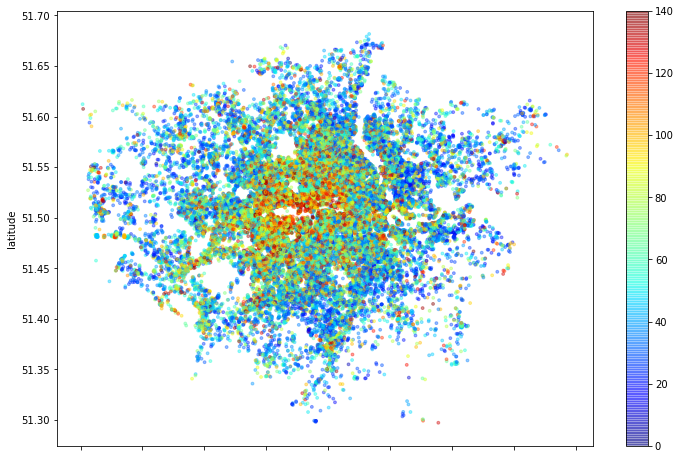

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


De acordo com o gráfico conseguimos observar que temos **City of London** como uma referência e local com preços mais altos, conforme vamos nos distanciando, os valores vão diminuindo.

# **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,62459.000000
mean,2.831505
std,3.589246
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


De acordo com os valores acima temos:
* Uma média de no mínimo 3 dias de hospedagem
* 75% dos dados estão abaixo de 3 dias
* Até 30 dias como o mínimo de hospedagem 

# **Conclusões**


De início, com os dados conseguimos identificar valores outliers presentes em **calculated_host_listings_count**, **minimum_nigths** e **price**, após realizarmos a limpeza de 26.58% do dataset conseguimos seguir com as conclusões: 

As análises realizadas apontam **City of London** como a cidade mais cara para se hospedar, conforme a distância das demais cidades para **City of London** vai aumentando, os preços vão diminuindo e as quantidades de locais para se hospedar também. 
Em média as hospedagens podem ser realizadas com o mínimo de 3 dias, com média de preço de 68.59 podendo chegar até 140.00.

As informações que obtive confirmam que a cidade com maior atrativo para estudantes e pesquisadores é também a que tem o Top5 das melhores univerdidades de Londres, com as mesmas se distanciando no máximo 3,3 milhas de** City of London**.
